# Pru Wealth Data Test

Below we will explore a mock database of customers, policies and funds that are similar to the Pru Wealth data. The first section of this notebook will test your SQL skills, the second section will test your Python skills and visualisation skills.

The database file is called Prudential_Data.db

The three tables included in this database are:
* Customer_Table
* Policy_Table
* Fund_Table

You will need to have the following packages installed in your Python environment:
* numpy
* pandas
* sqlite3

For visualization use any package of your choice (e.g., matplotlib, seaborn, plotly).

Please complete and return the test before the deadline by emailing your copy of this notebook to: Denholm.Hesse@Prudential.co.uk. If you do not know the answer to a question feel free to use Google and Stack Overflow. This is to give you the option to teach yourself a concept from the internet to address a question which you do not know the answer to, please refrain from skipping questions. The test is meant to be completed by you only.

Good luck and have fun!

In [392]:
import numpy as np
import pandas as pd
import sqlite3

# SQL test

IMPORANT: Please make sure all questions in this section are solved using SQL by only editing the content of the variable *sqlite_query*. Please do not edit the below cell:

In [393]:
# Establish DB connection
conn = sqlite3.connect('Prudential_Data.db')

Below is an example of how to query the SQLlite databse from this Jupyter notebook. Please note that SQLlite might have a slightly different syntax from the SQL you normally use. Please do not edit the below cell:

In [394]:
sqlite_query = """
SELECT COUNT(*) 
from policy_table 
"""

pd.read_sql(sqlite_query, conn)

,COUNT(*)
0,1635


The first table "Customer_Table" contains personal information about the customers. Please do not edit the below cell:

In [218]:
sqlite_query = """
SELECT * 
from Customer_Table 
limit 10
"""

pd.read_sql(sqlite_query, conn)

,index,Customer ID,Email,Gender,Age,Postcode
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None
1,1,CO314757,None,Female,90,None
2,2,CO720602,None,Female,90,None
3,3,CO34804,None,Female,90,1495-701
4,4,CO474411,None,Male,90,301288
5,5,CO777973,None,Female,90,None
6,6,CO311505,None,Male,90,None
7,7,CO474987,None,Female,89,None
8,8,CO496581,None,Female,89,36520-000
9,9,CO862381,None,Male,89,8301


In [219]:
#Checking count in Customer_Table
sqlite_query = """
SELECT COUNT(*) 
from Customer_Table 
"""

pd.read_sql(sqlite_query, conn)

,COUNT(*)
0,999


The second table "Policy_Table" contains data relating to customer policies. The policy value is the current value of the policy. Please do not edit the below cell:

In [220]:
sqlite_query = """
SELECT * 
from Policy_Table 
limit 10
"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date
0,0,RET100072,CO276506,RETIREMENT,RETIREMENT ACCOUNT,270033.0,2016-01-02 00:00:00
1,1,RET100931,CO831289,RETIREMENT,RETIREMENT ACCOUNT,26394.0,2016-01-04 00:00:00
2,2,RET100682,CO784249,RETIREMENT,RETIREMENT ACCOUNT,773567.0,2016-01-04 00:00:00
3,3,RET100447,CO295533,RETIREMENT,RETIREMENT ACCOUNT,35512.0,2016-01-07 00:00:00
4,4,RET100390,CO901735,RETIREMENT,RETIREMENT ACCOUNT,767580.0,2016-01-08 00:00:00
5,5,RET100541,CO143079,RETIREMENT,RETIREMENT ACCOUNT,417616.0,2016-01-08 00:00:00
6,6,RET100134,CO85863,RETIREMENT,RETIREMENT ACCOUNT,970827.0,2016-01-12 00:00:00
7,7,RET100054,CO88500,RETIREMENT,RETIREMENT ACCOUNT,792376.0,2016-01-16 00:00:00
8,8,RET100256,CO535790,RETIREMENT,RETIREMENT ACCOUNT,535579.0,2016-01-17 00:00:00
9,9,RET100971,CO374628,RETIREMENT,RETIREMENT ACCOUNT,921596.0,2016-01-17 00:00:00


The final table "Fund_Table" contains historic data on the Policy Value (Policy_Value_Snapshot). The Policy_Value_Snapshot represents the value of the policy and the Date column is the date at which that value was recorded. The value may have changed overtime due to changes in the fund price or quanity of units the policy was invested in. Please do not edit the below cell:

In [221]:
sqlite_query = """
SELECT 
*
from Fund_Table
limit 5

"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Date,Product Category,Product Name,Policy_Value_Snapshot
0,0,ANN1221,CO408564,2009-10-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
1,1,ANN1221,CO408564,2009-11-30 00:00:00,ANNUITY,STANDARD ANNUITY,None
2,2,ANN1221,CO408564,2009-12-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
3,3,ANN1221,CO408564,2010-01-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
4,4,ANN1221,CO408564,2010-02-28 00:00:00,ANNUITY,STANDARD ANNUITY,None


In [222]:
#Checking count in Fund_Table
sqlite_query = """
SELECT COUNT(*) 
from Fund_Table 
"""

pd.read_sql(sqlite_query, conn)

,COUNT(*)
0,72121


If a question requires additional explanation for your answer, please add additional cells below the code. 

## Q1: What is the current average policy value split by each product name? 

In [395]:
#Average Policy Value split by Product_Name in descending order of Average_Poliy_Value

sqlite_query = """

SELECT P."PRODUCT NAME" AS "PRODUCT_NAME", Avg(P."POLICY VALUE") "AVERAGE_POLICY_VALUE"
    FROM POLICY_TABLE P
    GROUP BY "PRODUCT NAME"
    ORDER BY AVERAGE_POLICY_VALUE DESC;
    
"""

pd.read_sql(sqlite_query, conn)

,PRODUCT_NAME,AVERAGE_POLICY_VALUE
0,RETIREMENT ACCOUNT,504964.959960
1,FOCUSSED ISA,5746.341270
2,CORPORATE MEMBERSHIP,5697.285714
3,SIPP,5335.842466
4,NHS PENSION,5241.500000
5,PRUDENTIAL ISA,5161.135593
6,PRUDENTIAL INVESTMENT PLAN,5084.515152
7,PRU BOND,4516.389831
8,STANDARD ANNUITY,NaN


In [224]:
#Verifying values for Product_Name 'STANDARD ANNUITY' as it is appearing NaN

sqlite_query = """

SELECT MIN(P."POLICY VALUE") "MIN_POLICY_VALUE", MIN(P."POLICY VALUE") "MAX_POLICY_VALUE"
    FROM POLICY_TABLE P
    WHERE P."PRODUCT NAME"='STANDARD ANNUITY';

"""

pd.read_sql(sqlite_query, conn)

#Policy Value for Product 'STANDARD ANNUITY' is NaN for all the values.

,MIN_POLICY_VALUE,MAX_POLICY_VALUE
0,None,None


## Q2: How many customers opened a new policy in Q1 2017 who already had an existing pension product? 

In [396]:
#Method-1; Using Inner Join
#Considering Q1 during 1st January to 31st March

sqlite_query = """

SELECT COUNT(DISTINCT P."CUSTOMER ID") "Count_Of_New_Customers" 
    FROM POLICY_TABLE P 
    INNER JOIN Fund_Table F 
    ON P."CUSTOMER ID" = F."CUSTOMER ID"
    
    WHERE F."PRODUCT CATEGORY" = 'PENSION'
    AND P."POLICY START DATE" BETWEEN '2017-01-01' AND '2017-03-31';

"""
pd.read_sql(sqlite_query, conn)

,Count_Of_New_Customers
0,35


In [397]:
#Method-2; Using SubQuery
#Considering Q1 during 1st January to 31st March

sqlite_query = """

SELECT COUNT(DISTINCT "CUSTOMER ID") "Count_Of_New_Customers"
    FROM Fund_Table F 
    
    WHERE F."PRODUCT CATEGORY" = 'PENSION'
    AND "CUSTOMER ID" IN
    (
        SELECT DISTINCT "CUSTOMER ID"
        FROM POLICY_TABLE P 
        WHERE P."POLICY START DATE" BETWEEN '2017-01-01' AND '2017-03-31'
    );

"""
pd.read_sql(sqlite_query, conn)

,Count_Of_New_Customers
0,35



Solution: A total number of 35 customers opened a new policy in Q1 2017 (1-Jan-2017 to 31-Mar-2017) who already had an existing pension product.


## Q3: What was the customer ID that had the biggest difference in policy value between its earliest and latest date (for any product) ?

In [398]:
#Method-1 - Using INNER JOIN
#Finding solution based on difference in the 'Policy Amount' from its start date till date.

sqlite_query = """

SELECT  P."CUSTOMER ID", P."POLICY NUMBER", P."PRODUCT CATEGORY", 
        P."PRODUCT NAME", P."POLICY START DATE",
        ROUND(F.POLICY_VALUE_SNAPSHOT,2) AS POLICY_VALUE_INIT, ROUND(P."POLICY VALUE",2) AS POLICY_VALUE_CURR, 
        ROUND((P."POLICY VALUE" - F.POLICY_VALUE_SNAPSHOT),2) AS DIFFERENCE_AMOUNT
            
            FROM FUND_TABLE F INNER JOIN POLICY_TABLE P
            
                ON F."CUSTOMER ID"=P."CUSTOMER ID"
                AND F."POLICY NUMBER"=P."POLICY NUMBER"
                       
                WHERE F.POLICY_VALUE_SNAPSHOT IS NOT NULL  
                AND P."POLICY VALUE" IS NOT NULL
            
            GROUP BY P."CUSTOMER ID", P."POLICY NUMBER", P."PRODUCT CATEGORY", 
            P."PRODUCT NAME", P."POLICY START DATE"
            
            ORDER BY DIFFERENCE_AMOUNT DESC;
            
"""

pd.read_sql(sqlite_query, conn)

,Customer ID,Policy Number,Product Category,Product Name,Policy Start Date,POLICY_VALUE_INIT,POLICY_VALUE_CURR,DIFFERENCE_AMOUNT
0,CO401070,RET100479,RETIREMENT,RETIREMENT ACCOUNT,2016-06-30 00:00:00,55246.50,998530.0,943283.50
1,CO695759,RET100800,RETIREMENT,RETIREMENT ACCOUNT,2016-05-02 00:00:00,54188.61,994048.0,939859.39
2,CO517259,RET100760,RETIREMENT,RETIREMENT ACCOUNT,2016-09-14 00:00:00,58371.97,997883.0,939511.03
3,CO410118,RET100741,RETIREMENT,RETIREMENT ACCOUNT,2016-03-27 00:00:00,52446.00,991798.0,939352.00
4,CO636568,RET100920,RETIREMENT,RETIREMENT ACCOUNT,2016-03-30 00:00:00,52330.94,987771.0,935440.06
...,...,...,...,...,...,...,...,...
1508,CO48757,PXC4991,PENSION,SIPP,2012-05-24 00:00:00,24514.01,195.0,-24319.01
1509,CO619510,PXC4947,PENSION,CORPORATE MEMBERSHIP,2012-06-16 00:00:00,24509.40,130.0,-24379.40
1510,CO771962,PXC9587,PENSION,SIPP,2014-01-31 00:00:00,24411.21,4.0,-24407.21
1511,CO919180,B9013,BOND,PRUDENTIAL INVESTMENT PLAN,2010-09-25 00:00:00,24573.68,142.0,-24431.68


#Solution [Difference in terms of Policy Value]

Top Gainer:

Customer with Customer_ID CO401070 had the biggest rise in terms of Policy Value between its earliest and latest date for POLICY_NUMBER - RET100479;
PRODUCT_NAME - RETIREMENT ACCOUNT;
RISE IN POLICY AMOUNT = $943,283.50

Top Looser:

Customer with Customer_ID CO397079 had the biggest dip in terms of Policy Value between its earliest and latest date for POLICY_NUMBER - PXC3470;
PRODUCT_NAME - SIPP;
DIP IN POLICY AMOUNT = -$24,449.89


In [399]:
#Method-2 - Using NESTED JOINS
#Finding solution based on difference in the "Percentage of Policy Amount" from its start date till date.

sqlite_query = """

SELECT  OUT.CUSTOMER_ID, OUT.POLICY_NUM, OUT.PRODUCT_NM, ROUND(OUT.INIT,2) AS INITIAL_POLICY_VALUE, 
        ROUND(OUT.PV,2) AS CURRENT_POLICY_VALUE,  ROUND((OUT.PV - OUT.INIT),2) AS DIFFERENCE_VALUE, 
        ROUND(((OUT.PV - OUT.INIT)/OUT.INIT)*100,2) AS DIFFERENCE_PERCENTAGE
        
        FROM
        (
        
        SELECT  P."CUSTOMER ID" CUSTOMER_ID, P."POLICY NUMBER" POLICY_NUM,  P."PRODUCT NAME" PRODUCT_NM, P."POLICY VALUE" PV, 
        INN2.POLICY_VALUE_SNAPSHOT INIT
        
        FROM POLICY_TABLE P
        INNER JOIN
        (
            SELECT F."POLICY NUMBER" POL, F."PRODUCT NAME" PDN, DATE, "POLICY_VALUE_SNAPSHOT"
            FROM FUND_TABLE F 
            INNER JOIN
            (
                SELECT F1."POLICY NUMBER" PN, F1."PRODUCT NAME" PN, MIN(DATE) DT
                FROM FUND_TABLE F1
                GROUP BY F1."POLICY NUMBER", F1."PRODUCT NAME"
            ) INN

            ON INN.PN=F."POLICY NUMBER"
            WHERE F.DATE = INN.DT
        )INN2

        ON INN2.POL=P."POLICY NUMBER"
        WHERE INN2.PDN=P."PRODUCT NAME"
    )OUT
    
WHERE DIFFERENCE_VALUE IS NOT NULL
ORDER BY DIFFERENCE_PERCENTAGE DESC;

"""

pd.read_sql(sqlite_query, conn)

,CUSTOMER_ID,POLICY_NUM,PRODUCT_NM,INITIAL_POLICY_VALUE,CURRENT_POLICY_VALUE,DIFFERENCE_VALUE,DIFFERENCE_PERCENTAGE
0,CO85863,RET100134,RETIREMENT ACCOUNT,50385.81,970827.0,920441.19,1826.79
1,CO430567,RET100229,RETIREMENT ACCOUNT,51154.19,972921.0,921766.81,1801.94
2,CO410118,RET100741,RETIREMENT ACCOUNT,52446.00,991798.0,939352.00,1791.08
3,CO636568,RET100920,RETIREMENT ACCOUNT,52330.94,987771.0,935440.06,1787.55
4,CO800253,RET100829,RETIREMENT ACCOUNT,52239.63,984575.0,932335.37,1784.73
...,...,...,...,...,...,...,...
1508,CO545796,PXC6957,CORPORATE MEMBERSHIP,24384.63,116.0,-24268.63,-99.52
1509,CO397079,PXC3470,SIPP,24557.89,108.0,-24449.89,-99.56
1510,CO221235,B4778,PRUDENTIAL INVESTMENT PLAN,24351.11,73.0,-24278.11,-99.70
1511,CO110138,B8614,PRUDENTIAL INVESTMENT PLAN,24331.96,30.0,-24301.96,-99.88



#Solution [Difference in terms of Policy Value Percentage]

Top Gainer:

Customer with Customer_ID CO85863 had the biggest rise in terms of Percentage Change in the Policy Value between its earliest and latest date for 

POLICY_NUMBER - RET100134;
PRODUCT_NAME - RETIREMENT ACCOUNT;
% RISE IN POLICY AMOUNT = 1,826.79%


Top Looser:

Customer with Customer_ID CO771962 had the biggest dip in terms of Percentage Change in the Policy Value between its earliest and latest date for 

POLICY_NUMBER - PXC9587;
PRODUCT_NAME - SIPP;
% DIP IN POLICY AMOUNT = -99.98%


# Python Test

Same data, but now let's have some fun in python. Please do not use SQL for this part of the exercise. 

Feel free to add more cells of code or text

In [400]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [401]:
Customer_Table = pd.read_sql('SELECT * FROM Customer_Table', conn)
Policy_Table = pd.read_sql('SELECT * FROM Policy_Table', conn)
Fund_Table = pd.read_sql('SELECT * FROM Fund_Table', conn)

In [402]:
#Checking data in Customer_Table dataset
Customer_Table.head(20)

,index,Customer ID,Email,Gender,Age,Postcode
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None
1,1,CO314757,None,Female,90,None
2,2,CO720602,None,Female,90,None
3,3,CO34804,None,Female,90,1495-701
4,4,CO474411,None,Male,90,301288
5,5,CO777973,None,Female,90,None
6,6,CO311505,None,Male,90,None
7,7,CO474987,None,Female,89,None
8,8,CO496581,None,Female,89,36520-000
9,9,CO862381,None,Male,89,8301


In [376]:
#Checking data values 
Customer_Table.describe

<bound method NDFrame.describe of      index Customer ID                           Email  Gender  Age  Postcode
0        0    CO183683        NLUPPITT14@PARALLELS.COM    Male   90      None
1        1    CO314757                            None  Female   90      None
2        2    CO720602                            None  Female   90      None
3        3     CO34804                            None  Female   90  1495-701
4        4    CO474411                            None    Male   90    301288
..     ...         ...                             ...     ...  ...       ...
994    994    CO957494  CFRAMMINGHAM37@STUMBLEUPON.COM  Female   27     92736
995    995    CO503828      RRICCIARDELLI38@GOOGLE.COM    Male   24      None
996    996    CO340813           ODYZARTMY@SAMSUNG.COM    Male   22      None
997    997    CO403019          VENDLENT@MICROSOFT.COM  Female   22    735 41
998    998    CO274837       IOFIHILLIEDJ@BLOGSPOT.COM    Male   20      8306

[999 rows x 6 columns]>

In [377]:
Customer_Table.nunique()

index          999
Customer ID    999
Email          950
Gender           2
Age             62
Postcode       455
dtype: int64

In [238]:
Customer_Table['Email'].describe()

count                  952
unique                 950
top       NOEMAIL@MAIL.COM
freq                     3
Name: Email, dtype: object

In [239]:
Customer_Table.isnull().sum()

index            0
Customer ID      0
Email           47
Gender           0
Age              0
Postcode       538
dtype: int64

## Q4: Produce a list of customers which have an invalid email address. What do you notice about these customers? ##

Feel free to use any packages of your choice

In [378]:
Customer_Table[['Customer ID','Email']]

,Customer ID,Email
0,CO183683,NLUPPITT14@PARALLELS.COM
1,CO314757,None
2,CO720602,None
3,CO34804,None
4,CO474411,None
...,...,...
994,CO957494,CFRAMMINGHAM37@STUMBLEUPON.COM
995,CO503828,RRICCIARDELLI38@GOOGLE.COM
996,CO340813,ODYZARTMY@SAMSUNG.COM
997,CO403019,VENDLENT@MICROSOFT.COM


In [403]:
#importing validate_email
from validate_email import validate_email

#taking a copy of data to avoid any data modification in the original dataframe
df_Email = Customer_Table

df_Email['Email']=df_Email['Email'].apply(str)

#Validating using validate_email function
df_Email['Valid_Email'] = df_Email['Email'].apply(validate_email)

#Valid_Email coulmn will have respective True/False values for Valid or Invalid Emails

df_out = df_Email[~df_Email["Valid_Email"]] 
df_out[['Customer ID', 'Email']]

,Customer ID,Email
1,CO314757,None
2,CO720602,None
3,CO34804,None
4,CO474411,None
5,CO777973,None
6,CO311505,None
7,CO474987,None
8,CO496581,None
9,CO862381,None
22,CO401070,None


Solution:- Above is the list of 51 Customers who have Invalid Email IDs.

Observations:- -> 47 (4.7% of total) Customers have 'No Email IDs' associated to their data. 
               -> Most of the Invalid Email IDs are from Age Range > 85 Years.


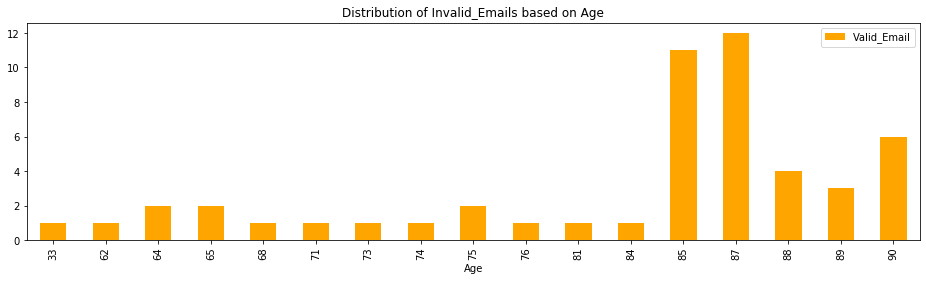

In [404]:
#Distribution of invalid_Emails based on Age Range

AgeGen = df_out[['Age','Valid_Email']]
AgeGen.groupby(['Age']).count().plot(kind='bar', title='Distribution of Invalid_Emails based on Age', color='Orange',figsize=(16,4))


## Q5: The Managing Director of Pru Wealth needs to see how policy value differs between other variables in the database (e.g. customer demographics) . They don't have time to read a report, so have asked for a cool visualisation that tells a story.

Visualise something cool, tell us a story! You can use packages like Matplotlib, Seaborn or Plotly.Tell us why you chose to visualise the data in this way and how it can be used from a business perspective.


In [405]:
#Checking data
Customer_Table.head()

,index,Customer ID,Email,Gender,Age,Postcode,Valid_Email
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None,True
1,1,CO314757,None,Female,90,None,False
2,2,CO720602,None,Female,90,None,False
3,3,CO34804,None,Female,90,1495-701,False
4,4,CO474411,None,Male,90,301288,False


In [406]:
#Joining/merging Customer and Policy Dataframes 
Customer_Policy_Combine = pd.merge(Customer_Table,Policy_Table,on='Customer ID')
Customer_Policy_Combine.head()

,index_x,Customer ID,Email,Gender,Age,Postcode,Valid_Email,index_y,Policy Number,Product Category,Product Name,Policy Value,Policy Start Date
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None,True,661,RET100041,RETIREMENT,RETIREMENT ACCOUNT,744154.0,2017-12-27 00:00:00
1,1,CO314757,None,Female,90,None,False,563,RET100125,RETIREMENT,RETIREMENT ACCOUNT,192389.0,2017-09-16 00:00:00
2,1,CO314757,None,Female,90,None,False,1562,ANN3661,ANNUITY,STANDARD ANNUITY,NaN,2013-05-21 00:00:00
3,2,CO720602,None,Female,90,None,False,875,RET100188,RETIREMENT,RETIREMENT ACCOUNT,904394.0,2018-08-11 00:00:00
4,3,CO34804,None,Female,90,1495-701,False,518,RET100566,RETIREMENT,RETIREMENT ACCOUNT,805735.0,2017-07-17 00:00:00


In [407]:
#Cleaning data by dropping index_x and index_y columns
Customer_Policy_Combine.drop(['index_x','index_y'], axis=1, inplace=True)
Customer_Policy_Combine.head()

,Customer ID,Email,Gender,Age,Postcode,Valid_Email,Policy Number,Product Category,Product Name,Policy Value,Policy Start Date
0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None,True,RET100041,RETIREMENT,RETIREMENT ACCOUNT,744154.0,2017-12-27 00:00:00
1,CO314757,None,Female,90,None,False,RET100125,RETIREMENT,RETIREMENT ACCOUNT,192389.0,2017-09-16 00:00:00
2,CO314757,None,Female,90,None,False,ANN3661,ANNUITY,STANDARD ANNUITY,NaN,2013-05-21 00:00:00
3,CO720602,None,Female,90,None,False,RET100188,RETIREMENT,RETIREMENT ACCOUNT,904394.0,2018-08-11 00:00:00
4,CO34804,None,Female,90,1495-701,False,RET100566,RETIREMENT,RETIREMENT ACCOUNT,805735.0,2017-07-17 00:00:00


In [408]:
#Checking number of NULL values in the dataset
Customer_Policy_Combine.isnull().sum()

Customer ID            0
Email                  0
Gender                 0
Age                    0
Postcode             880
Valid_Email            0
Policy Number          0
Product Category       0
Product Name           0
Policy Value         122
Policy Start Date      0
dtype: int64

122 Policy Values and 880 Postocodes are NULL.

In [409]:
Customer_Policy_Combine.groupby('Product Category').count()

,Customer ID,Email,Gender,Age,Postcode,Valid_Email,Policy Number,Product Name,Policy Value,Policy Start Date
Product Category,,,,,,,,,,
ANNUITY,122,122,122,122,61,122,122,122,0,122
BOND,158,158,158,158,78,158,158,158,158,158
ISA,185,185,185,185,77,185,185,185,185,185
PENSION,171,171,171,171,78,171,171,171,171,171
RETIREMENT,999,999,999,999,461,999,999,999,999,999


In [410]:
Customer_Policy_Combine['Policy Value'].isnull().sum()

122

In [411]:
#Dropping NULL Values from Policy Value (Product Category ='ANNUITY') to make charts better
Customer_Policy_Combine = Customer_Policy_Combine[Customer_Policy_Combine['Policy Value'].notna()]
Customer_Policy_Combine['Policy Value'].isnull().sum()

0

In [292]:
Customer_Policy_Combine.shape

(1513, 11)

Text(0.5, 1.0, 'Number of Active Policies by Product Category')

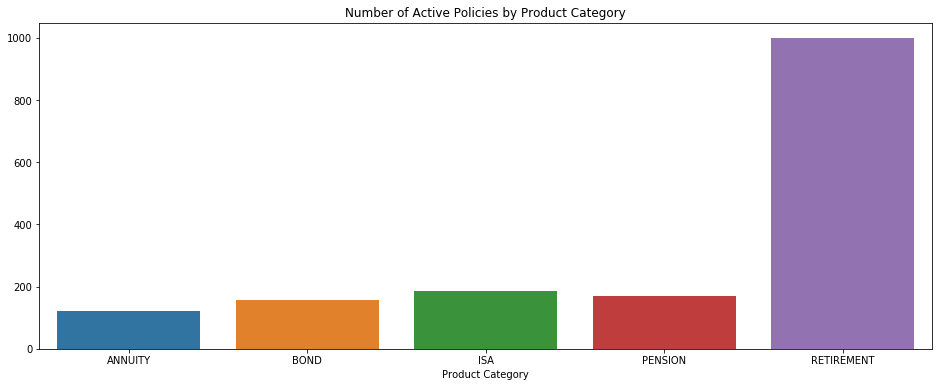

In [412]:
#Number of Active Policies by Prod Category
result = Policy_Table.groupby(['Product Category']).size()

# ploting the BAR chart
plt.figure(figsize=(16,6))
sns.barplot(x = result.index, y = result.values).set_title("Number of Active Policies by Product Category")


Text(0.5, 1.0, 'Number of Active Policies by Product Name')

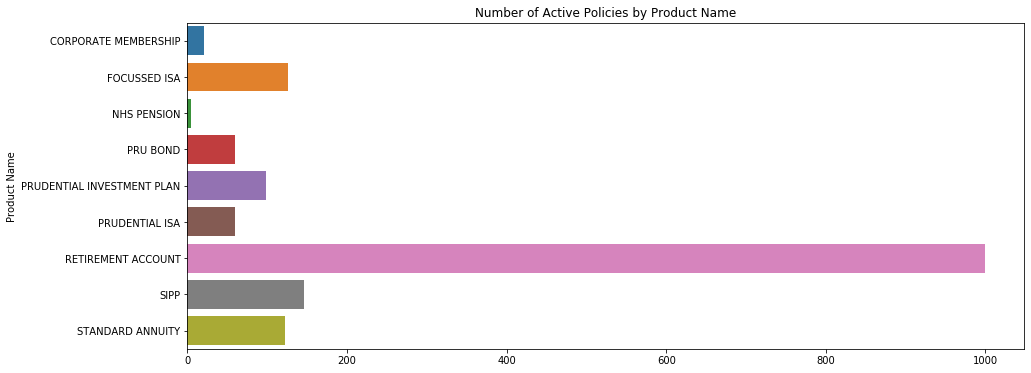

In [413]:
#Number of Active Policies by Prod Name
result = Policy_Table.groupby(['Product Name']).size()

# ploting the BAR chart
plt.figure(figsize=(15,6))
sns.barplot(y = result.index, x = result.values).set_title("Number of Active Policies by Product Name")


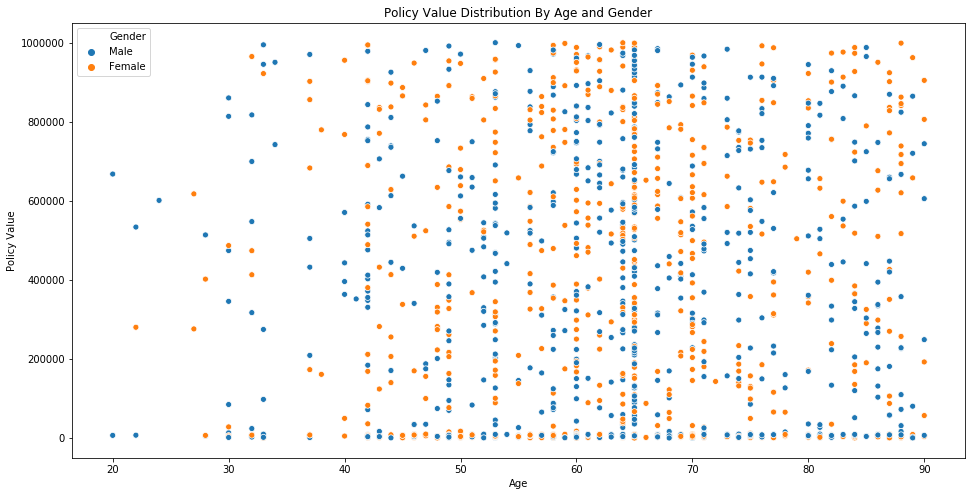

In [414]:
#ScatterPlot to depict Policy Value distribution based on Age and Gender

plt.figure(figsize=(16,8))
sns.scatterplot(x=Customer_Policy_Combine.Age , y=Customer_Policy_Combine['Policy Value'], 
                hue=Customer_Policy_Combine.Gender).set_title("Policy Value Distribution By Age and Gender")

plt.show()


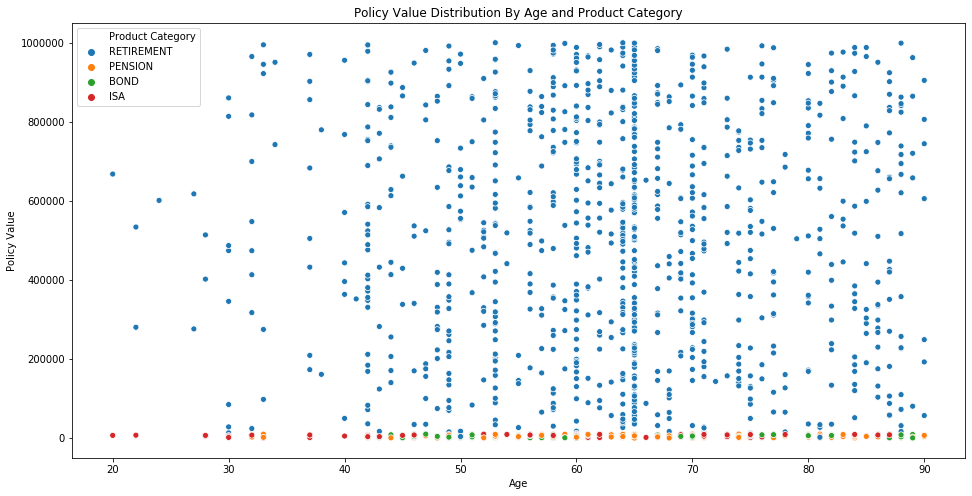

In [321]:
#ScatterPlot to depict Policy Value distribution based on Age and Prod Category

plt.figure(figsize=(16,8))
sns.scatterplot(x=Customer_Policy_Combine.Age , y=Customer_Policy_Combine['Policy Value'], 
                hue=Customer_Policy_Combine['Product Category']).set_title("Policy Value Distribution By Age and Product Category")

plt.show()


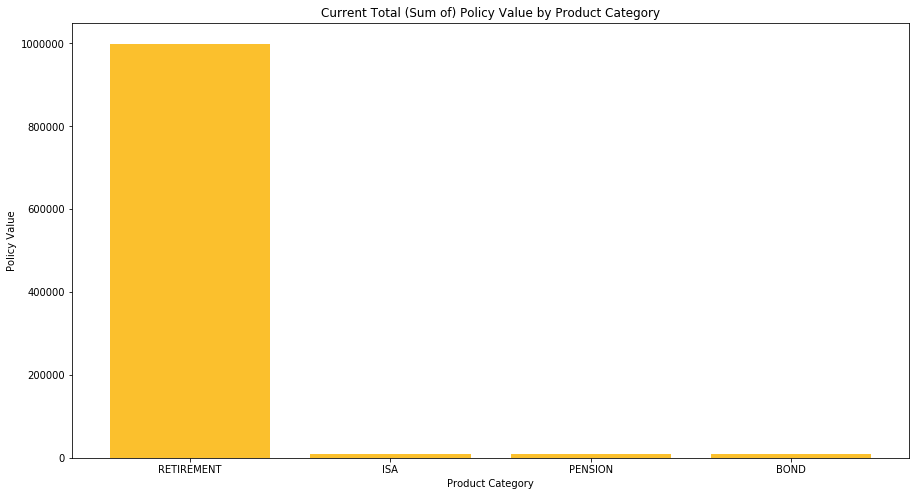

In [415]:
#Policy Value by Product Category

plt.figure(figsize=(15,8))
plt.bar(Policy_Table['Product Category'],Policy_Table['Policy Value'],color='#FBC02D')

plt.title('Current Total (Sum of) Policy Value by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Policy Value')

plt.show()

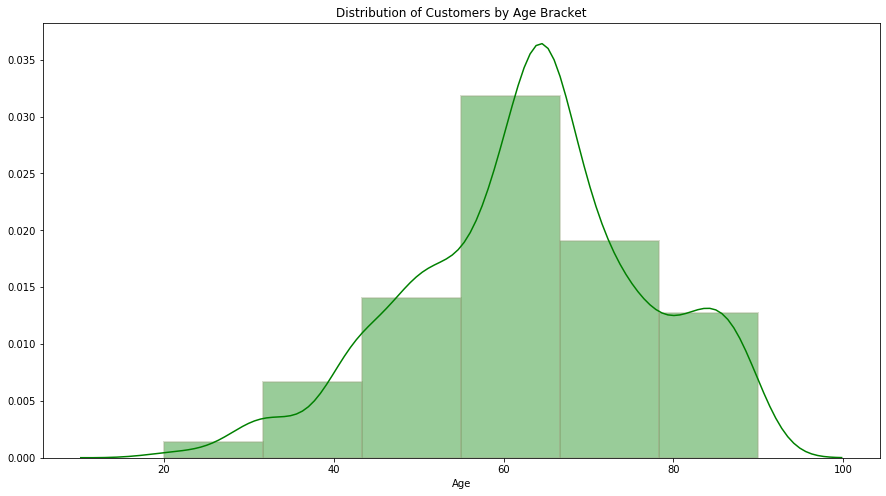

In [416]:
#Active Customers/Policies based on Age bracket
                                                                     
plt.figure(figsize=(15,8))
plt.title('Distribution of Customers by Age Bracket')

sns.distplot(Customer_Policy_Combine['Age'], bins=6,  hist_kws=dict(edgecolor = '#9dab86' ,linewidth=2) , color='green')

plt.show()